Infection Covid 19 rate vs. Home prices .

Question: 
How did Covid-19 affect Home Prices

Methods to determine outcome:
Create multi plot graphs to compare changes in Single Family Houses and Apartment Houses. 
Create bar graph to represent the changes in Single Family House median in different Provinces during Covid-19 time (2020-2023)


In [1]:
#Import Dependancies
import pandas as pd
import pathlib as path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Case Stud_
Real_estate_path= "Output/real_estate_clean.csv"
covid_case_path = "Output/covid19_df.csv"

In [3]:
#Read the CSV Files
Real_estate_df = pd.read_csv(Real_estate_path)
covid_case_df= pd.read_csv(covid_case_path)

In [4]:
#Diplay first dataframe
Real_estate_df.head

<bound method NDFrame.head of      Provience      Date  Composite HPI  Single Family HPI  One Storey HPI  \
0      Ontario  Jan 2005          100.0              100.0           100.0   
1      Ontario  Feb 2005          100.2              100.2           100.2   
2      Ontario  Mar 2005          100.6              100.6           100.3   
3      Ontario  Apr 2005          100.9              100.9           100.7   
4      Ontario  May 2005          101.3              101.3           100.9   
...        ...       ...            ...                ...             ...   
4555  Manitoba  Aug 2023          285.3              296.3           286.1   
4556  Manitoba  Sep 2023          285.7              296.4           285.3   
4557  Manitoba  Oct 2023          285.1              295.0           285.1   
4558  Manitoba  Nov 2023          282.4              292.5           283.1   
4559  Manitoba  Dec 2023          283.4              292.8           281.6   

      Two Storey HPI  Townhouse H

In [5]:
Real_estate_df.dtypes

Provience               object
Date                    object
Composite HPI          float64
Single Family HPI      float64
One Storey HPI         float64
Two Storey HPI         float64
Townhouse HPI          float64
Apartment HPI          float64
Composite House        float64
Single Family House    float64
One Storey House       float64
Two Storey House       float64
Townhouse House        float64
Apartment House        float64
dtype: object

In [6]:
# Convert the 'date' column to string data type
Real_estate_df['Date'] = Real_estate_df['Date'].astype(str)

# Extract the year component and store it in a new column named 'year'
Real_estate_df['year'] = pd.to_datetime(Real_estate_df['Date']).dt.year

# Convert the 'year' column from float to integer
Real_estate_df['year'] = Real_estate_df['year'].astype(int)

# Now, 'year' column contains integer values representing the years
print(Real_estate_df)

     Provience      Date  Composite HPI  Single Family HPI  One Storey HPI  \
0      Ontario  Jan 2005          100.0              100.0           100.0   
1      Ontario  Feb 2005          100.2              100.2           100.2   
2      Ontario  Mar 2005          100.6              100.6           100.3   
3      Ontario  Apr 2005          100.9              100.9           100.7   
4      Ontario  May 2005          101.3              101.3           100.9   
...        ...       ...            ...                ...             ...   
4555  Manitoba  Aug 2023          285.3              296.3           286.1   
4556  Manitoba  Sep 2023          285.7              296.4           285.3   
4557  Manitoba  Oct 2023          285.1              295.0           285.1   
4558  Manitoba  Nov 2023          282.4              292.5           283.1   
4559  Manitoba  Dec 2023          283.4              292.8           281.6   

      Two Storey HPI  Townhouse HPI  Apartment HPI  Composite H

/var/folders/b_/887n78691hx50ntzqgwlj53c0000gn/T/ipykernel_34721/1079933903.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Real_estate_df['year'] = pd.to_datetime(Real_estate_df['Date']).dt.year


In [7]:
# Now, 'year' column contains integer values representing the years
Real_estate_df

,Provience,Date,Composite HPI,Single Family HPI,One Storey HPI,Two Storey HPI,Townhouse HPI,Apartment HPI,Composite House,Single Family House,One Storey House,Two Storey House,Townhouse House,Apartment House,year
0,Ontario,Jan 2005,100.0,100.0,100.0,100.0,100.0,100.0,265700.0,287300.0,236200.0,312700.0,190400.0,184000.0,2005
1,Ontario,Feb 2005,100.2,100.2,100.2,100.2,100.0,100.3,266300.0,287900.0,236600.0,313300.0,190400.0,184600.0,2005
2,Ontario,Mar 2005,100.6,100.6,100.3,100.6,100.3,101.0,267300.0,289100.0,236800.0,314700.0,190900.0,185900.0,2005
3,Ontario,Apr 2005,100.9,100.9,100.7,100.9,100.4,101.2,268000.0,290000.0,237900.0,315500.0,191200.0,186200.0,2005
4,Ontario,May 2005,101.3,101.3,100.9,101.3,100.7,102.1,269100.0,291000.0,238300.0,316800.0,191700.0,187800.0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,Manitoba,Aug 2023,285.3,296.3,286.1,313.9,259.2,211.0,345200.0,363000.0,335600.0,405500.0,296800.0,223500.0,2023
4556,Manitoba,Sep 2023,285.7,296.4,285.3,315.2,261.3,214.4,345700.0,363100.0,334600.0,407300.0,299200.0,227000.0,2023
4557,Manitoba,Oct 2023,285.1,295.0,285.1,313.5,267.7,216.6,345000.0,361400.0,334400.0,405100.0,306500.0,229400.0,2023
4558,Manitoba,Nov 2023,282.4,292.5,283.1,308.4,266.0,214.1,341700.0,358300.0,332100.0,398400.0,304600.0,226700.0,2023


In [8]:
Real_estate_df= Real_estate_df.rename(columns={"Provience": "Province","year":"Year"})
Real_estate_df

,Province,Date,Composite HPI,Single Family HPI,One Storey HPI,Two Storey HPI,Townhouse HPI,Apartment HPI,Composite House,Single Family House,One Storey House,Two Storey House,Townhouse House,Apartment House,Year
0,Ontario,Jan 2005,100.0,100.0,100.0,100.0,100.0,100.0,265700.0,287300.0,236200.0,312700.0,190400.0,184000.0,2005
1,Ontario,Feb 2005,100.2,100.2,100.2,100.2,100.0,100.3,266300.0,287900.0,236600.0,313300.0,190400.0,184600.0,2005
2,Ontario,Mar 2005,100.6,100.6,100.3,100.6,100.3,101.0,267300.0,289100.0,236800.0,314700.0,190900.0,185900.0,2005
3,Ontario,Apr 2005,100.9,100.9,100.7,100.9,100.4,101.2,268000.0,290000.0,237900.0,315500.0,191200.0,186200.0,2005
4,Ontario,May 2005,101.3,101.3,100.9,101.3,100.7,102.1,269100.0,291000.0,238300.0,316800.0,191700.0,187800.0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,Manitoba,Aug 2023,285.3,296.3,286.1,313.9,259.2,211.0,345200.0,363000.0,335600.0,405500.0,296800.0,223500.0,2023
4556,Manitoba,Sep 2023,285.7,296.4,285.3,315.2,261.3,214.4,345700.0,363100.0,334600.0,407300.0,299200.0,227000.0,2023
4557,Manitoba,Oct 2023,285.1,295.0,285.1,313.5,267.7,216.6,345000.0,361400.0,334400.0,405100.0,306500.0,229400.0,2023
4558,Manitoba,Nov 2023,282.4,292.5,283.1,308.4,266.0,214.1,341700.0,358300.0,332100.0,398400.0,304600.0,226700.0,2023


In [9]:
#Display second dataframe
covid_case_df

,reporting_year,Province_ID,Province,Province_French,date,reporting_week,update,totalcases,numtotal_last7,ratecases_total,...,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,Month,Month_Year,Month_Year_Province
0,2020,59,British Columbia,Colombie-Britannique,2020-02-01,5,1.0,1,1.0,0.02,...,0,0.02,0,0.14,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-British Columbia
1,2020,48,Alberta,Alberta,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Alberta
2,2020,47,Saskatchewan,Saskatchewan,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Saskatchewan
3,2020,46,Manitoba,Manitoba,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Manitoba
4,2020,35,Ontario,Ontario,2020-02-01,5,1.0,3,0.0,0.02,...,0,0.02,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Ontario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,2024,60,Yukon,Yukon,2024-01-27,4,0.0,4989,NaN,11393.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Yukon
3131,2024,61,Northwest Territories,Territoires du Nord-Ouest,2024-01-27,4,0.0,11511,NaN,25240.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Northwest Territories
3132,2024,62,Nunavut,Nunavut,2024-01-27,4,0.0,3531,NaN,8712.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Nunavut
3133,2024,99,Repatriated travellers,Voyageurs rapatriés,2024-01-27,4,NaN,13,0.0,NaN,...,0,NaN,NaN,0.00,NaN,0.00,NaN,Jan,Jan-2024,Jan-2024-Repatriated travellers


In [10]:
covid_case_df = covid_case_df.rename(columns={"reporting_year":"Year", "totalcases":"Total Cases"})
covid_case_df

,Year,Province_ID,Province,Province_French,date,reporting_week,update,Total Cases,numtotal_last7,ratecases_total,...,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,Month,Month_Year,Month_Year_Province
0,2020,59,British Columbia,Colombie-Britannique,2020-02-01,5,1.0,1,1.0,0.02,...,0,0.02,0,0.14,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-British Columbia
1,2020,48,Alberta,Alberta,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Alberta
2,2020,47,Saskatchewan,Saskatchewan,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Saskatchewan
3,2020,46,Manitoba,Manitoba,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Manitoba
4,2020,35,Ontario,Ontario,2020-02-01,5,1.0,3,0.0,0.02,...,0,0.02,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Ontario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,2024,60,Yukon,Yukon,2024-01-27,4,0.0,4989,NaN,11393.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Yukon
3131,2024,61,Northwest Territories,Territoires du Nord-Ouest,2024-01-27,4,0.0,11511,NaN,25240.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Northwest Territories
3132,2024,62,Nunavut,Nunavut,2024-01-27,4,0.0,3531,NaN,8712.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Nunavut
3133,2024,99,Repatriated travellers,Voyageurs rapatriés,2024-01-27,4,NaN,13,0.0,NaN,...,0,NaN,NaN,0.00,NaN,0.00,NaN,Jan,Jan-2024,Jan-2024-Repatriated travellers


In [11]:
covid_case_grouped = covid_case_df.groupby(["Province","Year"])['Total Cases'].sum().reset_index()

# Creating a new DataFrame from the grouped data
covid_case_df = pd.DataFrame(covid_case_grouped)

# Displaying the first few rows
covid_case_df

,Province,Year,Total Cases
0,Alberta,2020,964330
1,Alberta,2021,12099764
2,Alberta,2022,29870850
3,Alberta,2023,33019709
4,Alberta,2024,2597112
...,...,...,...
70,Yukon,2020,826
71,Yukon,2021,27642
72,Yukon,2022,224711
73,Yukon,2023,259428


In [12]:
grouped_by_province = covid_case_df.groupby("Province")

# Specify the provinces you want to extract data for
desired_provinces = ["Ontario", "Newfoundland and Labrador", "British Columbia"]

# Create an empty list to store DataFrames for each province
province_groups = []

# Loop through the desired provinces and get the group for each
for province in desired_provinces:
    province_group = grouped_by_province.get_group(province)
    province_groups.append(province_group)

In [13]:

for province_group in province_groups:
    print(province_group)

   Province  Year  Total Cases
45  Ontario  2020      2356738
46  Ontario  2021     25903762
47  Ontario  2022     68837452
48  Ontario  2023     84594614
49  Ontario  2024      6801384
                     Province  Year  Total Cases
25  Newfoundland and Labrador  2020        11422
26  Newfoundland and Labrador  2021        74328
27  Newfoundland and Labrador  2022      2240774
28  Newfoundland and Labrador  2023      2898078
29  Newfoundland and Labrador  2024       231128
           Province  Year  Total Cases
5  British Columbia  2020       477505
6  British Columbia  2021      7725195
7  British Columbia  2022     19161557
8  British Columbia  2023     20976785
9  British Columbia  2024      1659400


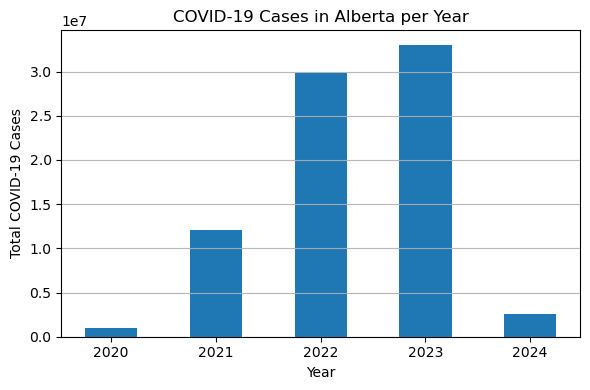

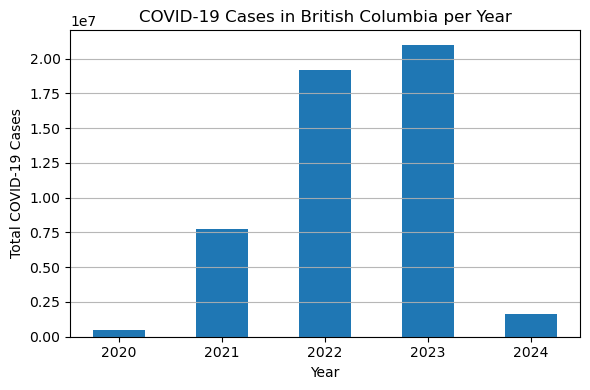

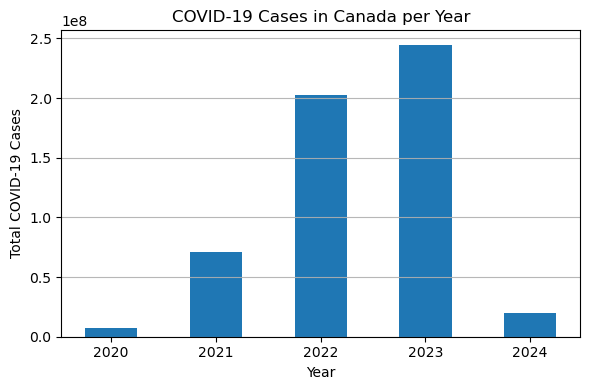

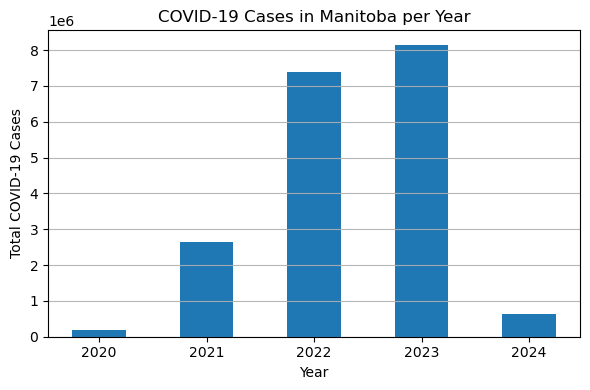

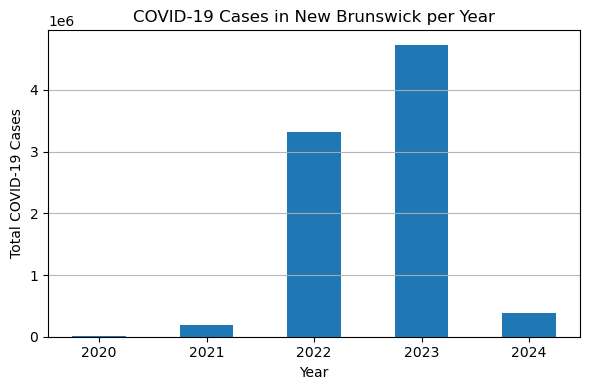

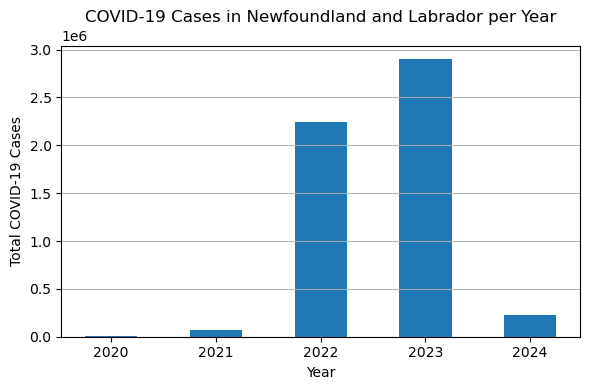

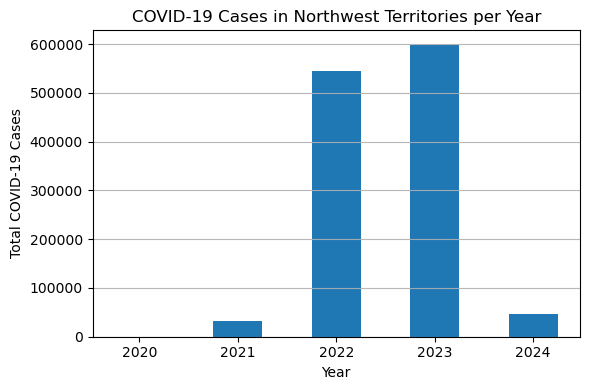

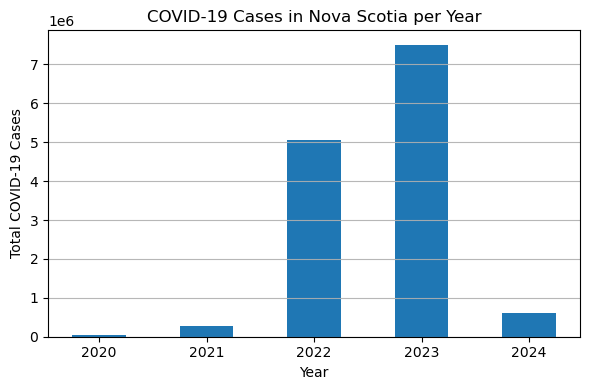

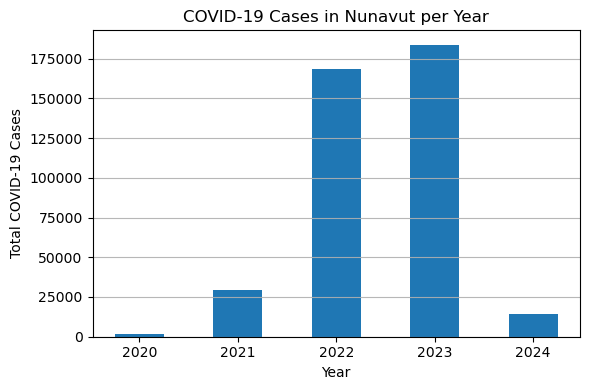

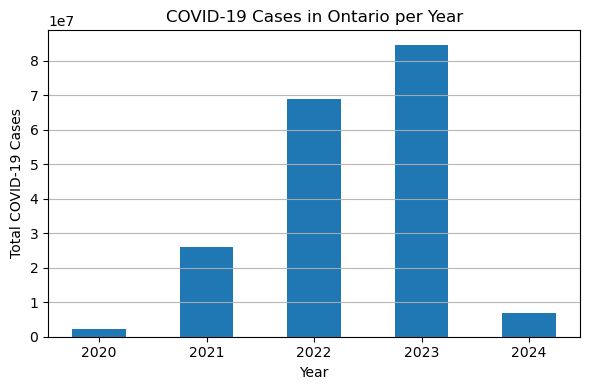

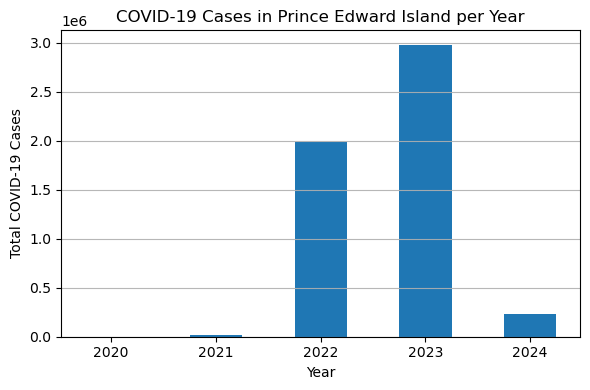

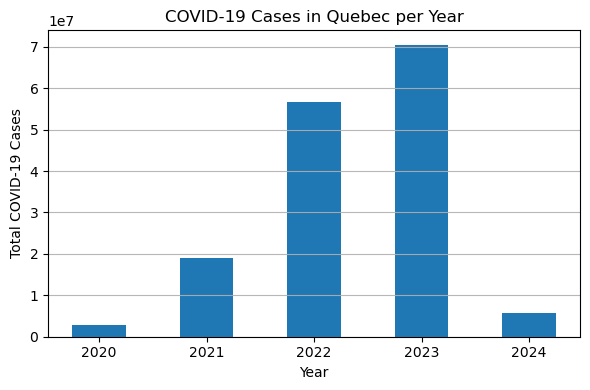

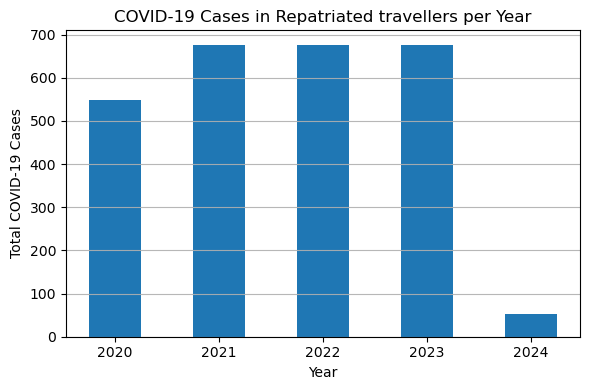

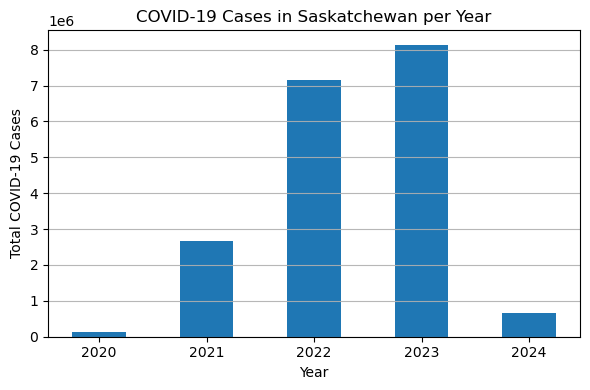

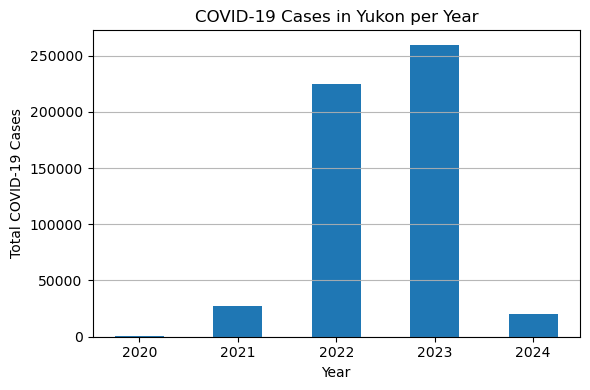

In [14]:
covid_case_provinces= covid_case_df.pivot_table(index='Year', columns='Province', values='Total Cases', aggfunc='sum')

# Plotting bar graphs for each province
for province in covid_case_provinces.columns:
    plt.figure(figsize=(6, 4))
    plt.bar(covid_case_provinces.index, covid_case_provinces[province], width=0.5)
    plt.title(f'COVID-19 Cases in {province} per Year')
    plt.xlabel('Year')
    plt.ylabel('Total COVID-19 Cases')
    plt.xticks(covid_case_provinces.index)
    plt.grid(axis='y', linestyle='-', alpha=0.9)
    plt.tight_layout()
    plt.savefig('Output/Covid-19 total cases in Each Provience per Year.png')
    plt.show()

In [15]:
Real_estate_df_grouped = Real_estate_df.groupby(['Province','Year']).agg({'Single Family House': ['median']})
Real_estate_df_grouped.columns = ['Single Family House median']
Real_estate_df_grouped

Single Family House median
Province   Year                            
Aggregrate 2005                    266700.0
           2006                    302450.0
           2007                    335900.0
           2008                    343200.0
           2009                    328100.0
...                                     ...
Vancouver  2019                    689550.0
           2020                    758650.0
           2021                    974000.0
           2022                   1118050.0
           2023                   1010050.0

[133 rows x 1 columns]

In [16]:
# #Combine data into one dataframe
covid_realestate_df = pd.merge(Real_estate_df,covid_case_df, how = "outer", on = ["Year"])
covid_realestate_df

,Province_x,Date,Composite HPI,Single Family HPI,One Storey HPI,Two Storey HPI,Townhouse HPI,Apartment HPI,Composite House,Single Family House,One Storey House,Two Storey House,Townhouse House,Apartment House,Year,Province_y,Total Cases
0,Ontario,Jan 2005,100.0,100.0,100.0,100.0,100.0,100.0,265700.0,287300.0,236200.0,312700.0,190400.0,184000.0,2005,NaN,NaN
1,Ontario,Feb 2005,100.2,100.2,100.2,100.2,100.0,100.3,266300.0,287900.0,236600.0,313300.0,190400.0,184600.0,2005,NaN,NaN
2,Ontario,Mar 2005,100.6,100.6,100.3,100.6,100.3,101.0,267300.0,289100.0,236800.0,314700.0,190900.0,185900.0,2005,NaN,NaN
3,Ontario,Apr 2005,100.9,100.9,100.7,100.9,100.4,101.2,268000.0,290000.0,237900.0,315500.0,191200.0,186200.0,2005,NaN,NaN
4,Ontario,May 2005,101.3,101.3,100.9,101.3,100.7,102.1,269100.0,291000.0,238300.0,316800.0,191700.0,187800.0,2005,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Prince Edward Island,233216.0
18011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Quebec,5775023.0
18012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Repatriated travellers,52.0
18013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Saskatchewan,648819.0


In [17]:
covid_realestate_df = covid_realestate_df.rename(columns={"Province_x":"Province"})
covid_realestate_df

,Province,Date,Composite HPI,Single Family HPI,One Storey HPI,Two Storey HPI,Townhouse HPI,Apartment HPI,Composite House,Single Family House,One Storey House,Two Storey House,Townhouse House,Apartment House,Year,Province_y,Total Cases
0,Ontario,Jan 2005,100.0,100.0,100.0,100.0,100.0,100.0,265700.0,287300.0,236200.0,312700.0,190400.0,184000.0,2005,NaN,NaN
1,Ontario,Feb 2005,100.2,100.2,100.2,100.2,100.0,100.3,266300.0,287900.0,236600.0,313300.0,190400.0,184600.0,2005,NaN,NaN
2,Ontario,Mar 2005,100.6,100.6,100.3,100.6,100.3,101.0,267300.0,289100.0,236800.0,314700.0,190900.0,185900.0,2005,NaN,NaN
3,Ontario,Apr 2005,100.9,100.9,100.7,100.9,100.4,101.2,268000.0,290000.0,237900.0,315500.0,191200.0,186200.0,2005,NaN,NaN
4,Ontario,May 2005,101.3,101.3,100.9,101.3,100.7,102.1,269100.0,291000.0,238300.0,316800.0,191700.0,187800.0,2005,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Prince Edward Island,233216.0
18011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Quebec,5775023.0
18012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Repatriated travellers,52.0
18013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Saskatchewan,648819.0


In [18]:
covid_realestate_df = covid_realestate_df.dropna()
covid_realestate_df.head

<bound method NDFrame.head of        Province      Date  Composite HPI  Single Family HPI  One Storey HPI  \
3600    Ontario  Jan 2020          236.3              234.0           228.9   
3601    Ontario  Jan 2020          236.3              234.0           228.9   
3602    Ontario  Jan 2020          236.3              234.0           228.9   
3603    Ontario  Jan 2020          236.3              234.0           228.9   
3604    Ontario  Jan 2020          236.3              234.0           228.9   
...         ...       ...            ...                ...             ...   
17995  Manitoba  Dec 2023          283.4              292.8           281.6   
17996  Manitoba  Dec 2023          283.4              292.8           281.6   
17997  Manitoba  Dec 2023          283.4              292.8           281.6   
17998  Manitoba  Dec 2023          283.4              292.8           281.6   
17999  Manitoba  Dec 2023          283.4              292.8           281.6   

       Two Storey HPI

In [19]:
covid_realestate_df

,Province,Date,Composite HPI,Single Family HPI,One Storey HPI,Two Storey HPI,Townhouse HPI,Apartment HPI,Composite House,Single Family House,One Storey House,Two Storey House,Townhouse House,Apartment House,Year,Province_y,Total Cases
3600,Ontario,Jan 2020,236.3,234.0,228.9,237.0,261.6,273.0,627900.0,672400.0,540600.0,741000.0,498100.0,502300.0,2020,Alberta,964330.0
3601,Ontario,Jan 2020,236.3,234.0,228.9,237.0,261.6,273.0,627900.0,672400.0,540600.0,741000.0,498100.0,502300.0,2020,British Columbia,477505.0
3602,Ontario,Jan 2020,236.3,234.0,228.9,237.0,261.6,273.0,627900.0,672400.0,540600.0,741000.0,498100.0,502300.0,2020,Canada,7105487.0
3603,Ontario,Jan 2020,236.3,234.0,228.9,237.0,261.6,273.0,627900.0,672400.0,540600.0,741000.0,498100.0,502300.0,2020,Manitoba,190514.0
3604,Ontario,Jan 2020,236.3,234.0,228.9,237.0,261.6,273.0,627900.0,672400.0,540600.0,741000.0,498100.0,502300.0,2020,New Brunswick,10018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,Manitoba,Dec 2023,283.4,292.8,281.6,312.0,273.2,217.5,342900.0,358700.0,330300.0,403100.0,312800.0,230300.0,2023,Prince Edward Island,2976023.0
17996,Manitoba,Dec 2023,283.4,292.8,281.6,312.0,273.2,217.5,342900.0,358700.0,330300.0,403100.0,312800.0,230300.0,2023,Quebec,70459207.0
17997,Manitoba,Dec 2023,283.4,292.8,281.6,312.0,273.2,217.5,342900.0,358700.0,330300.0,403100.0,312800.0,230300.0,2023,Repatriated travellers,676.0
17998,Manitoba,Dec 2023,283.4,292.8,281.6,312.0,273.2,217.5,342900.0,358700.0,330300.0,403100.0,312800.0,230300.0,2023,Saskatchewan,8132451.0


In [20]:
homeprices_df= covid_realestate_df.groupby(["Province","Year"])
homeprices_df= pd.DataFrame(homeprices_df[['Single Family House','One Storey House',
                                          'Townhouse House','Apartment House']].median())
homeprices_df

Single Family House  One Storey House  \
Province                  Year                                          
Aggregrate                2020             599800.0          458200.0   
                          2021             765300.0          593550.0   
                          2022             853250.0          655350.0   
                          2023             809550.0          619650.0   
Alberta                   2020             425000.0          368450.0   
                          2021             451350.0          389400.0   
                          2022             497100.0          421000.0   
                          2023             508300.0          432000.0   
Manitoba                  2020             300750.0          282400.0   
                          2021             343750.0          320900.0   
                          2022             366850.0          339750.0   
                          2023             358200.0          330950.0   
Newfoundland and Labrador 2020             234600.0          211550.0   
                          2021             255600.0          232900.0   
                          2022             280600.0          257050.0   
                          2023             286050.0          262700.0   
Ontario                   2020             646000.0          590950.0   
                          2021             853300.0          779550.0   
                          2022             934800.0          843900.0   
                          2023             873900.0          788400.0   
Saskatchewan              2020             331250.0          293700.0   
                          2021             357950.0          312800.0   
                          2022             375850.0          324900.0   
                          2023             381150.0          326900.0   
Vancouver                 2020             758650.0          704750.0   
                          2021             974000.0          907150.0   
                          2022            1118050.0         1022250.0   
                          2023            1010050.0          935700.0   

                                Townhouse House  Apartment House  
Province                  Year                                    
Aggregrate                2020         503900.0         435700.0  
                          2021         619550.0         480350.0  
                          2022         716700.0         554400.0  
                          2023         677650.0         541100.0  
Alberta                   2020         268850.0         213000.0  
                          2021         278800.0         214000.0  
                          2022         300750.0         223800.0  
                          2023         318900.0         236800.0  
Manitoba                  2020         255050.0         200000.0  
                          2021         277100.0         212600.0  
                          2022         304250.0         224950.0  
                          2023         290400.0         222050.0  
Newfoundland and Labrador 2020         232600.0         191000.0  
                          2021         258050.0         196050.0  
                          2022         269050.0         215400.0  
                          2023         274050.0         227200.0  
Ontario                   2020         461700.0         391550.0  
                          2021         615900.0         481600.0  
                          2022         707000.0         577950.0  
                          2023         661350.0         530450.0  
Saskatchewan              2020         255550.0         187150.0  
                          2021         265500.0         198950.0  
                          2022         278250.0         209700.0  
                          2023         289000.0         217150.0  
Vancouver                 2020         535300.0         383700.0  
                          2021  

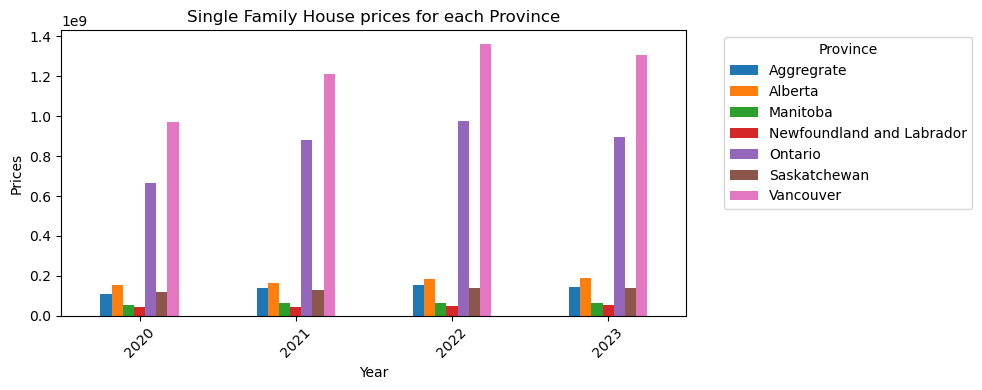

In [21]:
price_province_year_df = covid_realestate_df.groupby(["Province", "Year"])['Single Family House'].sum().reset_index()
pivot_table = price_province_year_df.pivot(index='Year', columns='Province', values='Single Family House')

# Plotting the pivot table
pivot_table.plot(kind='bar', figsize=(10, 4))

# Adding titles and labels
plt.title('Single Family House prices for each Province')
plt.xlabel('Year')
plt.ylabel('Prices')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the legend
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')

# Showing the plot
plt.tight_layout()
plt.show()

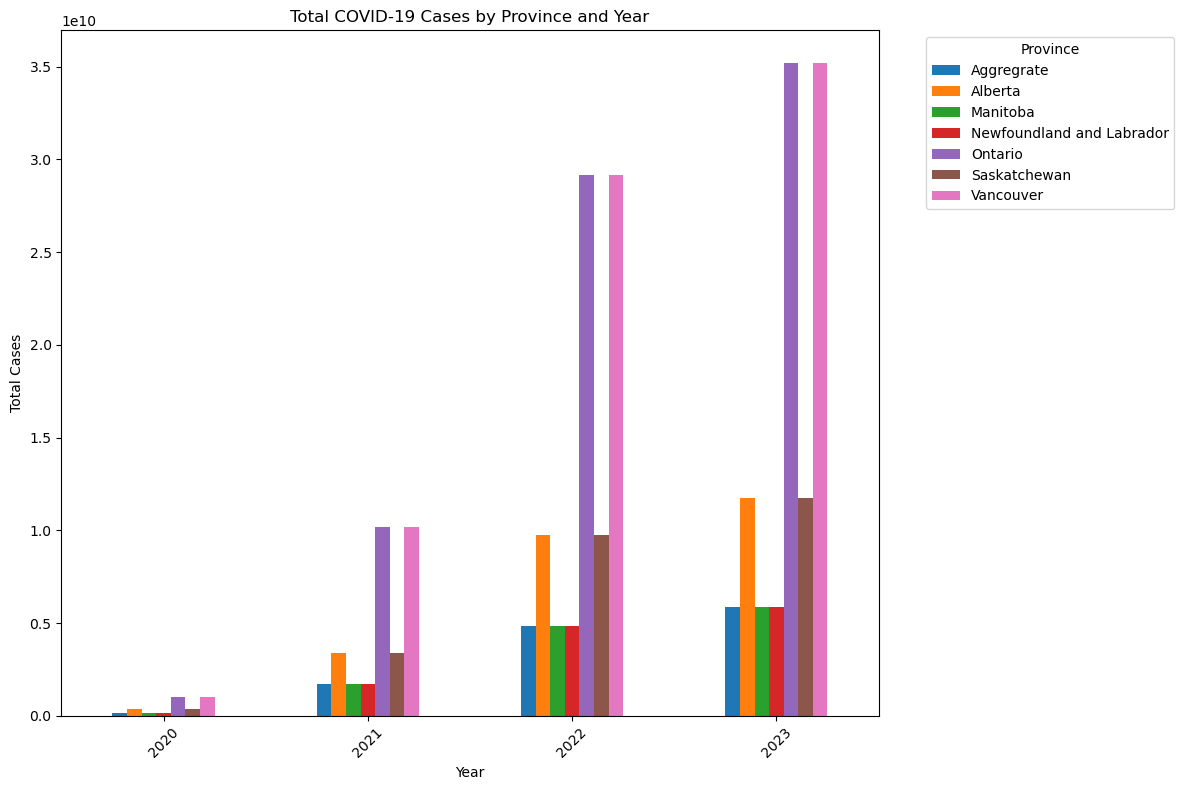

In [22]:
# Grouping by "Province" and "Year", summing the "Total Cases" within each group
price_province_df = covid_realestate_df.groupby(["Province", "Year"])['Total Cases'].sum().reset_index()

# Creating a pivot table for easier plotting
pivot_table = price_province_df.pivot(index='Year', columns='Province', values='Total Cases')

# Plotting the pivot table
pivot_table.plot(kind='bar', figsize=(12, 8))

# Adding titles and labels
plt.title('Total COVID-19 Cases by Province and Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the legend
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')

# Showing the plot
plt.tight_layout()
plt.show()

In [23]:
homeprices_df= covid_realestate_df.groupby(["Province"])
homeprices_df= pd.DataFrame(homeprices_df[['Single Family House','One Storey House',
                                          'Townhouse House','Apartment House']].median())
homeprices_df

,Single Family House,One Storey House,Townhouse House,Apartment House
Province,,,,
Aggregrate,792400.0,607250.0,659850.0,523650.0
Alberta,449550.0,385000.0,277450.0,213000.0
Manitoba,348950.0,324750.0,287400.0,216850.0
Newfoundland and Labrador,267550.0,242650.0,260750.0,201600.0
Ontario,818450.0,761650.0,606600.0,501850.0
Saskatchewan,348650.0,305800.0,270800.0,202450.0
Vancouver,919900.0,848900.0,657800.0,449200.0


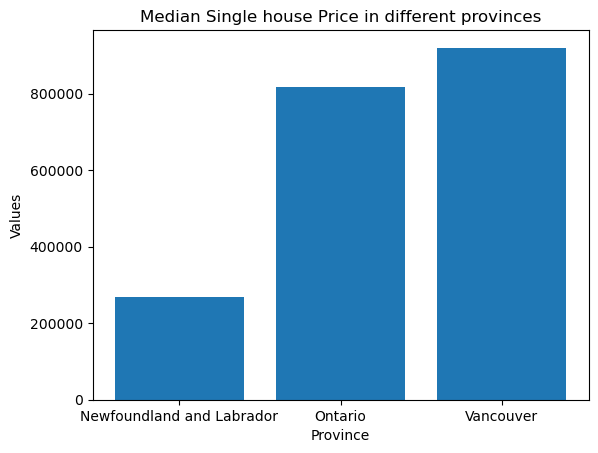

In [24]:
import matplotlib.pyplot as plt

Province= ['Newfoundland and Labrador','Ontario','Vancouver']
Single_Family_House = [267550.0,818450.0,919900.0]

# Create bar plot
plt.bar(Province,Single_Family_House )

# Add labels and title
plt.xlabel('Province')
plt.ylabel('Values')
plt.title('Median Single house Price in different provinces')

# Display the plot
plt.show()

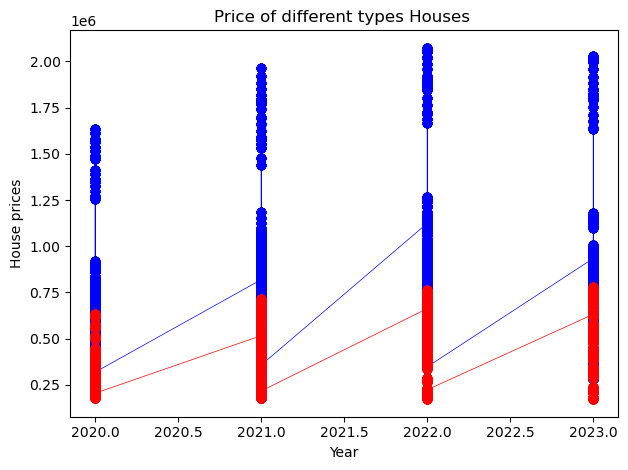

In [25]:
# Plotting Prime rate vs Year
plt.plot(covid_realestate_df["Year"], covid_realestate_df["Single Family House"], marker = "o", color = "b", linewidth = "0.5")
plt.plot(covid_realestate_df["Year"], covid_realestate_df["Apartment House"], marker = "o", color = "r", linewidth = "0.5")
plt.xlabel("Year")
plt.ylabel("House prices")
plt.title("Price of different types Houses ")
plt.tight_layout()
plt.savefig("Output_data/different types Houses .png")
plt.show()